<a href="https://colab.research.google.com/github/swordshik/colab/blob/main/laptops_proj_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/4pmib23198cod46lraqzy/laptops_dataset.csv?rlkey=2syn08rvf674ajugkzjx87smn&dl=0' -O laptops_dataset.csv

--2024-01-30 05:16:42--  https://www.dropbox.com/scl/fi/4pmib23198cod46lraqzy/laptops_dataset.csv?rlkey=2syn08rvf674ajugkzjx87smn&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc653e7246b0ce5599ff0974f688.dl.dropboxusercontent.com/cd/0/inline/CMTGGQ-fXg7IdJKuZtpNAmALDgUW4FrFXonoz57omnXD9m-uUhcbUicfWzmRCP4tSrgty4490Sbzd8oFH4O9uARoqgjP526qpWTcCfN2ftZXTaelMhko6RDzQcfwQPWiRUdDa0d0AWYTojiIdDbMoatk/file# [following]
--2024-01-30 05:16:43--  https://uc653e7246b0ce5599ff0974f688.dl.dropboxusercontent.com/cd/0/inline/CMTGGQ-fXg7IdJKuZtpNAmALDgUW4FrFXonoz57omnXD9m-uUhcbUicfWzmRCP4tSrgty4490Sbzd8oFH4O9uARoqgjP526qpWTcCfN2ftZXTaelMhko6RDzQcfwQPWiRUdDa0d0AWYTojiIdDbMoatk/file
Resolving uc653e7246b0ce5599ff0974f688.dl.dropboxusercontent.com (uc653e7246b0ce5599ff0974f688.dl.dropboxusercontent.com)... 162.1

In [ ]:
df = pd.read_csv('laptops_dataset.csv')

# Describe

Мы спарсили данные с сайта Sulpak.kg, в которых отображен ассортимент продаваемых данным магазином ноутбуков. Это очень маленький датасет но он отображает реальный спрос жителей Кыргызстана на эти устройства, ибо спрос рождает предложение. Предлагаю сделать небольшую аналитику данного рынка. Мы, к сожалению,  не располагаем историей продаж, но обычно в магазине есть то, что покупают и нет того, что не пользуется спросом. Это неплохой кейс для получения первоначального опыта в подготовке и анализе данных.

# Preprocessing

1. Изучите структуру датасета и типы данных.
2. При желании переименуйте названия колонок. Сделайте их на английском языке без пробелов, например `processor_model`. (Не обязательно)
3. Количественные фичи, такие как стоимость и частота процессора, превратите в числовой вид убрав лишние символы. Единицы измерения лучше добавить в название колонки. Например `Base_processor_frequency_GHz`
4. Диагональ дисплея представлена в дюймах и см. Сделайте из этой фичи две числовые - в см и дюймах отдельно. Размерность (единицы измерения) укажите в названии. Помните, что в названии колонки стоит избегать пробелов.
5. Сделайте фичу только с производителем процессора. (Intel, Apple...)
6. Сделайте фичу только с типом процессора (Core i5, M2 ...)
7. Тип и объем накопителя логичнее представить как 2 признака с типом и объемом.
8. Из названия ноутбука сделайте 2 фичи с брендом и названием модели. Спецификацию, например информацию о накопителе и процессоре из названия модели можно убрать.



# Analysis

## Task_1

Изучим такие признаки как страна производитель, категория ноутбука и брэнда.
* Посчитайте количество ноутов по странам производителя и постройте барплот
* посчитайте количество ноутов по категориям (игровой, ультребук...) и постройте барплот
* Посчитайте компы по брендам и постройте барплот. Все три барплота можно сделать по отдельности а можно собрать в один дашборд. Не забывайте указывать названия графиков.
* Для каждой категории (Игровой, ультрабук...) расчитайте средний вес (точнее массу, ибо вес измеряется в Ньютонах, хаха) в кг и покажите на графике.
* Постройте сводный барплот по количеству ноутов по категориям и странам производителя. Примерная идея указана на графике ниже.

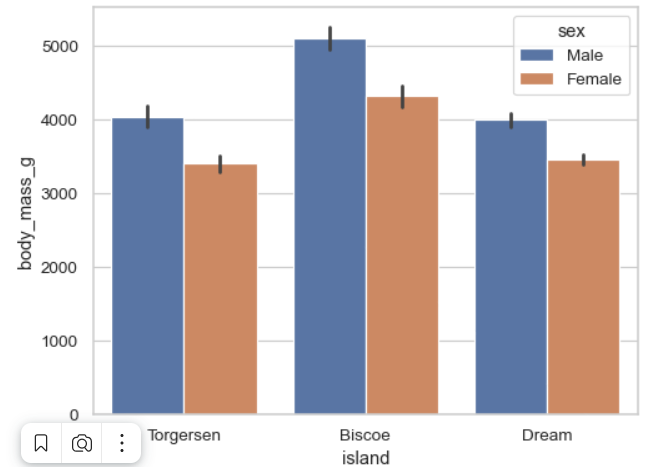

## Task_2

Осторожно, буквы..
______________________________________________________________

Изучим GPU. На компах бывает интегрированная графика и дискретная. Графический процессор необходим для формирования изображения.
* Графическое ядро может быть непосредственно частью центрального процессора, как и видео память. Это называется Встроенной (интегрированной) графикой. Такое характерно для бюджетных и маломощных моделей заточенных под Word & Excel LoL.
* Но невпихуемое не впихнуть, поэтому на более мощных компах GPU выполнен в виде отдельного видеочипа (графического процессора) и отдельно на плате распаяна видео память. Это называется Дискретным (раздельным) GPU. Основные производители чипов GPU - это NVIDIA & AMD. На таких компах уже можно поиграть и иногда модельки потренить. Для обучения злых и тяжелых моделей машинного обучения (на нейросетях) чаще всего используются мощности GPU в силу особенности его архитектуры.
____________________________________________________________________________

* Посчитайте количество компов по категориям, у которых дискретная графика и покажите это на графике.
* Постройте боксплот распределения стоимости для всех компов со встроенной графикой и дискретной на одном графике.
* Постройте этот же график для каждого бренда. Сделайте выводы. Последний график должен быть похожим на этот:

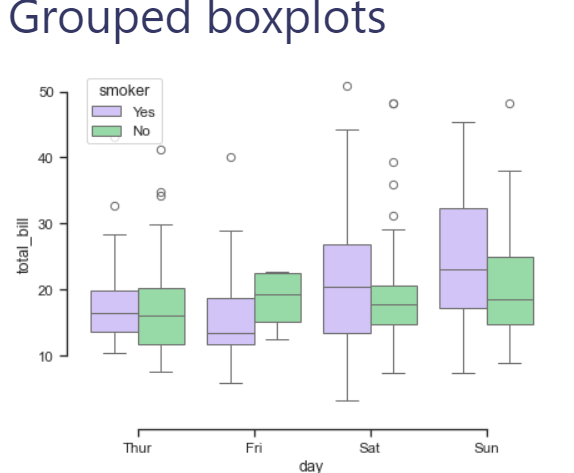

## Task_3

* У какого производителя и в какой категории чаще всего есть подсветка клавиатуры?
* Игровые компы какой страны-производителя наиболее дешевые? Не ориентируйтесь по возможности только на среднее значение.
* Каким производителем чаще всего представлены ультрабуки? (из этой категори исключите Apple).
* При всем разнообразии, процессоры какого производителя более дешевые (Intel, AMD). Покажите это на графике (графиках).
* Преимущественно в каких категориях компов есть подолнительные слоты RAM (оперативной памяти)?

## Task_4

Вы можете сформировать свои идеи, что вы еще хотели бы поискать в данных. Попробуйте это сделать.